In [1]:
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [2]:
dataset = pd.read_csv("Hasil TES SBK LPDP Gelombang 1 - 2021.csv")
dataset

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham
...,...,...,...,...,...,...,...,...,...,...
426,Reguler,S2,Dalam negeri,718,Tidak,Tidak,23,25,12,UGM
427,Reguler,S2,Dalam negeri,TRP,Tidak,Tidak,14,14,6,UI
428,Targeted,S2,Luar Negeri,ENT,Tidak,Tidak,15,7,9,Imperial College London
429,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,17,11,6,NaN


Data yang digunakan dalam pemrosesan data harus lah numeric. Maka, saya akan mengubah semua variabel tipe object menjadi numeric.

##### encode categorical data

In [3]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
dataset['Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?']= label_encoder.fit_transform(dataset['Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?'])
dataset['Jenis Beasiswa'] = label_encoder.fit_transform(dataset['Jenis Beasiswa'])
dataset['Tingkat Pendidikan yang Dituju'] = label_encoder.fit_transform(dataset['Tingkat Pendidikan yang Dituju'])
dataset['Negara Tujuan Kuliah'] = label_encoder.fit_transform(dataset['Negara Tujuan Kuliah'])
dataset['Bidang Studi yang dipilih saat mendaftar'] = label_encoder.fit_transform(dataset['Bidang Studi yang dipilih saat mendaftar'])
dataset['Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP'] = label_encoder.fit_transform(dataset['Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP'])
dataset['[optional] Kampus/universitas tujuan saat ini (pilihan 1)'] = label_encoder.fit_transform(dataset['[optional] Kampus/universitas tujuan saat ini (pilihan 1)'])
dataset

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,2,0,0,79,0,1,10,12,6,105
1,1,0,1,34,1,1,17,22,8,76
2,2,0,1,33,1,1,16,18,7,31
3,1,0,0,52,0,0,15,12,4,77
4,0,0,1,52,0,1,16,9,7,120
...,...,...,...,...,...,...,...,...,...,...
426,1,0,0,2,0,0,23,25,12,77
427,1,0,0,79,0,0,14,14,6,79
428,2,0,1,36,0,0,15,7,9,23
429,2,0,0,79,0,1,17,11,6,165


##### cek pencilan

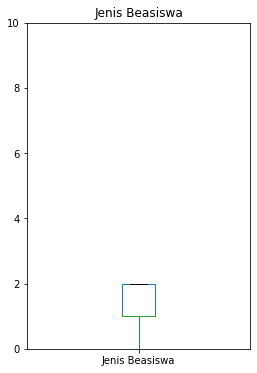

In [6]:
#cek pencilan
import matplotlib.pyplot as plt
dataset['Jenis Beasiswa'].plot(kind='box',figsize=(4,6))
plt.title("Jenis Beasiswa")
plt.ylim(0,10)
plt.show()

tidak terdapat pencilan pada variabel ini. Maka, variabel ini dibiarkan saja.

In [7]:
X = dataset.drop(labels=["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"],axis=1) # Features
y = dataset["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"] # Target

#### RandomForestClassifier Model

In [8]:
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f' % (mean(n_scores)))

Accuracy: 0.892
